In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
!ls lipid_data

c315.1.w_cont_dc_ft.csv        do315.1.w_cont_hbond_hb_ft.csv
c315.1.w_cont_hbond_hb_ft.csv  ds315.1.w_cont_dc_ft.csv
c315.2.w_cont_dc_ft.csv        ds315.1.w_cont_hbond_hb_ft.csv
c315.2.w_cont_hbond_hb_ft.csv  s315.1.w_cont_dc_ft.csv
do315.1.w_cont_dc_ft.csv       s315.1.w_cont_hbond_hb_ft.csv


## Готовый скрипт

Основной код

In [ ]:
# состав мембраны
membrane = pd.DataFrame({'lipid_type':['POPC', 'POPE', 'POPS', 'sapi', 'SMP', 'CHL'],
                         'number':[209, 114, 108, 54, 111, 277]})
membrane['part'] = membrane.number / membrane.number.sum()

# прочитать полученный файл
data=pd.read_csv('do315.1.w_cont_dc_ft.csv', header=None, sep='\s+').drop(columns=5)
data.columns = list(i for i in range(0, 11))
data[10] = data[10].apply(lambda x:x[1:])

# вероятности взаимодействия для липидов
lipid_p=dict()
total_time = np.array(data[10], dtype=float).sum() #общее время
for lipid_type in data[3].unique():
    data_lipid = data.loc[data[3]==lipid_type]
    lipid_time = np.array(data_lipid[10], dtype=float).sum() #время для каждого липида
    p = lipid_time/total_time
    lipid_p[lipid_type]=p
    print('{0}: {1}'.format(lipid_type, p))
    
lipid_p = pd.DataFrame({'lipid_type':list(lipid_p.keys()),
                       'p_int':list(lipid_p.values())})

lipid_p = lipid_p.merge(membrane, on='lipid_type', how='outer')
lipid_p['relative_p_int'] = lipid_p.p_int/lipid_p.part

# Водородные связи

data_hbonds=pd.read_csv('do315.1.w_cont_hbond_hb_ft.csv', header=None, sep='\s+').drop(columns=5)
data_hbonds.columns = list(i for i in range(0, 11))
data_hbonds[10] = data_hbonds[10].apply(lambda x:x[1:])

lipid_hbonds_p=dict()
total_time = np.array(data_hbonds[10], dtype=float).sum() #общее время
for lipid_type in data_hbonds[3].unique():
    data_lipid_hbonds = data_hbonds.loc[data_hbonds[3]==lipid_type]
    lipid_time = np.array(data_lipid_hbonds[10], dtype=float).sum() #время для каждого липида
    p = lipid_time/total_time
    lipid_hbonds_p[lipid_type]=p
    print('{0}: {1}'.format(lipid_type, p))
    
lipid_hbonds_p = pd.DataFrame({'lipid_type':list(lipid_hbonds_p.keys()),
                               'p_hbond':list(lipid_hbonds_p.values())})

lipid_hbonds_p = lipid_hbonds_p.merge(membrane, on='lipid_type', how='outer')
lipid_hbonds_p['relative_p_hbond'] = lipid_hbonds_p.p_hbond/lipid_hbonds_p.part

lipid_data = lipid_p.merge(lipid_hbonds_p.loc[:,['lipid_type', 'p_hbond','relative_p_hbond']], on='lipid_type', how='outer')

## Сама функция

___

In [3]:
def p_lipids(file_int, file_hbonds, membrane_compound, ignore_CHL=False):    
    # состав мембраны
    if ignore_CHL:
        del membrane_compound['CHL']
    
    membrane = pd.DataFrame({'lipid_type':list(membrane_compound.keys()),
                             'number':list(membrane_compound.values())})
    membrane['part'] = membrane.number / membrane.number.sum()

    # прочитать полученный файл
    data=pd.read_csv(file_int, header=None, sep='\s+').drop(columns=5)
    data.columns = list(i for i in range(0, 11))
    data[10] = data[10].apply(lambda x:x[1:])
    
    if ignore_CHL:
        data = data.loc[~(data[3]=='CHL')]

    # вероятности взаимодействия для липидов
    lipid_p=dict()
    total_time = np.array(data[10], dtype=float).sum() #общее время
    for lipid_type in data[3].unique():
        data_lipid = data.loc[data[3]==lipid_type]
        lipid_time = np.array(data_lipid[10], dtype=float).sum() #время для каждого липида
        p = lipid_time/total_time
        lipid_p[lipid_type]=p

    lipid_p = pd.DataFrame({'lipid_type':list(lipid_p.keys()),
                           'p_int':list(lipid_p.values())})

    
    lipid_p = lipid_p.merge(membrane, on='lipid_type', how='inner')
    lipid_p['relative_p_int'] = lipid_p.p_int/lipid_p.part

    # Водородные связи

    data_hbonds=pd.read_csv(file_hbonds, header=None, sep='\s+').drop(columns=5)
    data_hbonds.columns = list(i for i in range(0, 11))
    data_hbonds[10] = data_hbonds[10].apply(lambda x:x[1:])
    
    if ignore_CHL:
        data_hbonds = data_hbonds.loc[~(data_hbonds[3]=='CHL')]

    lipid_hbonds_p=dict()
    total_time = np.array(data_hbonds[10], dtype=float).sum() #общее время
    for lipid_type in data_hbonds[3].unique():
        data_lipid_hbonds = data_hbonds.loc[data_hbonds[3]==lipid_type]
        lipid_time = np.array(data_lipid_hbonds[10], dtype=float).sum() #время для каждого липида
        p = lipid_time/total_time
        lipid_hbonds_p[lipid_type]=p

    lipid_hbonds_p = pd.DataFrame({'lipid_type':list(lipid_hbonds_p.keys()),
                                   'p_hbond':list(lipid_hbonds_p.values())})

    lipid_hbonds_p = lipid_hbonds_p.merge(membrane, on='lipid_type', how='inner')
    lipid_hbonds_p['relative_p_hbond'] = lipid_hbonds_p.p_hbond/lipid_hbonds_p.part

    lipid_data = lipid_p.merge(lipid_hbonds_p.loc[:,['lipid_type', 'p_hbond','relative_p_hbond']], on='lipid_type', how='outer')
    
    return lipid_data

___

Проверка без холестерина

In [22]:
membrane_compound={'POPS':108, 'sapi':54, 'SMP':111, 'CHL':277, 'POPC':209, 'POPE':114}
data_do3151w = p_lipids(file_int='lipid_data/do315.1.w_cont_dc_ft.csv',
                       file_hbonds='lipid_data/do315.1.w_cont_hbond_hb_ft.csv',
                       membrane_compound=membrane_compound,
                       ignore_CHL=True)

Вероятность взаимодействия с белком
POPC: 0.27216855187583355
SMP: 0.16275267927847067
POPE: 0.1996247565420987
POPS: 0.15013429124291974
CHL: 0.1438468244601939
sapi: 0.07147289660048343
Вероятность образования водородных связей
SMP: 0.1583572347366436
POPC: 0.2195865784355394
POPS: 0.23758229447842402
POPE: 0.18663501079433348
sapi: 0.11241024659492962
CHL: 0.08542863496012992


In [25]:
# состав мембраны
membrane = pd.DataFrame({'lipid_type':['POPC', 'POPE', 'POPS', 'sapi', 'SMP'],
                         'number':[209, 114, 108, 54, 111]})
membrane['part'] = membrane.number / membrane.number.sum()

# прочитать полученный файл
data=pd.read_csv('lipid_data/do315.1.w_cont_dc_ft.csv', header=None, sep='\s+').drop(columns=5)
data.columns = list(i for i in range(0, 11))
data[10] = data[10].apply(lambda x:x[1:])

# вероятности взаимодействия для липидов
lipid_p=dict()
total_time = np.array(data[10], dtype=float).sum() #общее время
for lipid_type in data[3].unique():
    data_lipid = data.loc[data[3]==lipid_type]
    lipid_time = np.array(data_lipid[10], dtype=float).sum() #время для каждого липида
    p = lipid_time/total_time
    lipid_p[lipid_type]=p
    print('{0}: {1}'.format(lipid_type, p))
    
lipid_p = pd.DataFrame({'lipid_type':list(lipid_p.keys()),
                       'p_int':list(lipid_p.values())})

lipid_p = lipid_p.merge(membrane, on='lipid_type', how='outer')
lipid_p['relative_p_int'] = lipid_p.p_int/lipid_p.part

# Водородные связи

data_hbonds=pd.read_csv('lipid_data/do315.1.w_cont_hbond_hb_ft.csv', header=None, sep='\s+').drop(columns=5)
data_hbonds.columns = list(i for i in range(0, 11))
data_hbonds[10] = data_hbonds[10].apply(lambda x:x[1:])

lipid_hbonds_p=dict()
total_time = np.array(data_hbonds[10], dtype=float).sum() #общее время
for lipid_type in data_hbonds[3].unique():
    data_lipid_hbonds = data_hbonds.loc[data_hbonds[3]==lipid_type]
    lipid_time = np.array(data_lipid_hbonds[10], dtype=float).sum() #время для каждого липида
    p = lipid_time/total_time
    lipid_hbonds_p[lipid_type]=p
    print('{0}: {1}'.format(lipid_type, p))
    
lipid_hbonds_p = pd.DataFrame({'lipid_type':list(lipid_hbonds_p.keys()),
                               'p_hbond':list(lipid_hbonds_p.values())})

lipid_hbonds_p = lipid_hbonds_p.merge(membrane, on='lipid_type', how='outer')
lipid_hbonds_p['relative_p_hbond'] = lipid_hbonds_p.p_hbond/lipid_hbonds_p.part

lipid_data = lipid_p.merge(lipid_hbonds_p.loc[:,['lipid_type', 'p_hbond','relative_p_hbond']], on='lipid_type', how='outer')

POPC: 0.27216855187583355
SMP: 0.16275267927847067
POPE: 0.1996247565420987
POPS: 0.15013429124291974
CHL: 0.1438468244601939
sapi: 0.07147289660048343
SMP: 0.1583572347366436
POPC: 0.2195865784355394
POPS: 0.23758229447842402
POPE: 0.18663501079433348
sapi: 0.11241024659492962
CHL: 0.08542863496012992


In [26]:
lipid_data

,lipid_type,p_int,number,part,relative_p_int,p_hbond,relative_p_hbond
0,POPC,0.272169,209.0,0.350671,0.776136,0.219587,0.626189
1,SMP,0.162753,111.0,0.186242,0.873879,0.158357,0.850278
2,POPE,0.199625,114.0,0.191275,1.043652,0.186635,0.975741
3,POPS,0.150134,108.0,0.181208,0.828519,0.237582,1.311102
4,CHL,0.143847,NaN,NaN,NaN,0.085429,NaN
5,sapi,0.071473,54.0,0.090604,0.788849,0.112410,1.240676


## кароче функция p_lipids(file_int, file_hbonds, membrane_compound, ignore_CHL=False) работает нормально

___

# do315.1.w

## Состав мембраны

In [93]:
membrane = pd.DataFrame({'lipid_type':['POPC', 'POPE', 'POPS', 'sapi', 'SMP', 'CHL'],
                         'number':[209, 114, 108, 54, 111, 277]})

In [94]:
membrane['part'] = membrane.number / membrane.number.sum()

In [95]:
membrane

,lipid_type,number,part
0,POPC,209,0.239404
1,POPE,114,0.130584
2,POPS,108,0.123711
3,sapi,54,0.061856
4,SMP,111,0.127148
5,CHL,277,0.317297


___

# Взаимодействия

In [49]:
x=pd.read_csv('lipid_data/do315.1.w_cont_dc_ft.csv', header=None, sep='\s+').drop(columns=5)

In [58]:
x.loc[x[7]==2][10].min() 

211

In [55]:
x.loc[x[7]==1][10].nunique()

265

In [38]:
data

,0,1,2,3,4,6,7,8,9,10,11
0,4,109,0,POPC,1,3,3,368,LEU,482,",1.0"
1,4,136,0,POPC,1,2,2,343,LEU,457,",1.0"
2,8,566,0,SMP,1,2,2,455,PHE,569,",1.0"
3,8,573,0,SMP,1,1,1,542,PHE,656,",1.0"
4,5,279,0,POPE,1,3,3,392,PHE,506,",1.0"
...,...,...,...,...,...,...,...,...,...,...,...
7328,4,149,0,POPC,1,1,1,132,LYS,246,",0.00012498437695288088"
7329,6,384,0,POPS,1,3,3,370,LEU,484,",0.00012498437695288088"
7330,4,149,0,POPC,1,1,1,135,PHE,249,",0.00012498437695288088"
7331,4,149,0,POPC,1,1,1,180,SER,294,",0.00012498437695288088"


In [39]:
data.columns = list(i for i in range(0, 11))

In [40]:
data[10] = data[10].apply(lambda x:x[1:])

In [19]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,4,109,0,POPC,1,3,3,368,LEU,482,1.0
1,4,136,0,POPC,1,2,2,343,LEU,457,1.0
2,8,566,0,SMP,1,2,2,455,PHE,569,1.0
3,8,573,0,SMP,1,1,1,542,PHE,656,1.0
4,5,279,0,POPE,1,3,3,392,PHE,506,1.0


In [58]:
lipid_p=dict()
total_time = np.array(data[10], dtype=float).sum() #общее время
for lipid_type in data[3].unique():
    data_lipid = data.loc[data[3]==lipid_type]
    lipid_time = np.array(data_lipid[10], dtype=float).sum() #время для каждого липида
    p = lipid_time/total_time
    lipid_p[lipid_type]=p
    print('{0}: {1}'.format(lipid_type, p))

POPC: 0.27216855187583355
SMP: 0.16275267927847067
POPE: 0.1996247565420987
POPS: 0.15013429124291974
CHL: 0.1438468244601939
sapi: 0.07147289660048343


In [59]:
lipid_p = pd.DataFrame({'lipid_type':list(lipid_p.keys()),
                       'p_int':list(lipid_p.values())})

In [60]:
lipid_p

,lipid_type,p_int
0,POPC,0.272169
1,SMP,0.162753
2,POPE,0.199625
3,POPS,0.150134
4,CHL,0.143847
5,sapi,0.071473


In [54]:
membrane

,lipid_type,number,part
0,POPC,209,0.239404
1,POPE,114,0.130584
2,POPS,108,0.123711
3,sapi,54,0.061856
4,SMP,111,0.127148
5,CHL,277,0.317297


In [61]:
lipid_p = lipid_p.merge(membrane, on='lipid_type', how='outer')

In [63]:
lipid_p['relative_p_int'] = lipid_p.p_int/lipid_p.part

In [65]:
lipid_p

,lipid_type,p_int,number,part,relative_p_int
0,POPC,0.272169,209,0.239404,1.136857
1,SMP,0.162753,111,0.127148,1.280028
2,POPE,0.199625,114,0.130584,1.528705
3,POPS,0.150134,108,0.123711,1.213586
4,CHL,0.143847,277,0.317297,0.453351
5,sapi,0.071473,54,0.061856,1.155478


# Hbonds

In [ ]:
data_hbonds=pd.read_csv('do315.1.w_cont_hbond_hb_ft.csv', header=None, sep='\s+').drop(columns=5)
data_hbonds.columns = list(i for i in range(0, 11))
data_hbonds[10] = data_hbonds[10].apply(lambda x:x[1:])

lipid_hbonds_p=dict()
total_time = np.array(data_hbonds[10], dtype=float).sum() #общее время
for lipid_type in data_hbonds[3].unique():
    data_lipid_hbonds = data_hbonds.loc[data_hbonds[3]==lipid_type]
    lipid_time = np.array(data_lipid_hbonds[10], dtype=float).sum() #время для каждого липида
    p = lipid_time/total_time
    lipid_hbonds_p[lipid_type]=p
    print('{0}: {1}'.format(lipid_type, p))
    
lipid_hbonds_p = pd.DataFrame({'lipid_type':list(lipid_hbonds_p.keys()),
                               'p_hbond':list(lipid_hbonds_p.values())})

lipid_hbonds_p = lipid_hbonds_p.merge(membrane, on='lipid_type', how='outer')
lipid_hbonds_p['relative_p_hbond'] = lipid_hbonds_p.p_hbond/lipid_hbonds_p.part

lipid_data = lipid_p.merge(lipid_hbonds_p.loc[:,['lipid_type', 'p_hbond','relative_p_hbond']], on='lipid_type', how='outer')

In [1]:
!ls

do315.1.w_cont_dc_ft.csv  do315.1.w_cont_hbond_hb_ft.csv  TRPV3_lipids.ipynb
do315.1.w_cont_dc_nc.csv  do315.1.w_cont_hbond_hb_nc.csv


In [5]:
data_hbonds=pd.read_csv('do315.1.w_cont_hbond_hb_ft.csv', header=None, sep='\s+').drop(columns=5)

In [8]:
data_hbonds.columns = list(i for i in range(0, 11))

In [9]:
data_hbonds[10] = data_hbonds[10].apply(lambda x:x[1:])

In [10]:
data_hbonds.head()

,0,1,2,3,4,5,6,7,8,9,10
0,8,544,0,SMP,1,0,0,457,SER,571,0.9948756405449319
1,4,109,0,POPC,1,3,3,366,SER,480,0.982127234095738
2,6,375,0,POPS,1,1,1,600,ARG,714,0.9468816397950256
3,4,56,0,POPC,1,3,3,430,TYR,544,0.9147606549181352
4,4,49,0,POPC,1,0,0,598,ARG,712,0.90976127984002


In [17]:
lipid_hbonds_p=dict()
total_time = np.array(data_hbonds[10], dtype=float).sum() #общее время
for lipid_type in data_hbonds[3].unique():
    data_lipid_hbonds = data_hbonds.loc[data_hbonds[3]==lipid_type]
    lipid_time = np.array(data_lipid_hbonds[10], dtype=float).sum() #время для каждого липида
    p = lipid_time/total_time
    lipid_hbonds_p[lipid_type]=p
    print('{0}: {1}'.format(lipid_type, p))

SMP: 0.1583572347366436
POPC: 0.2195865784355394
POPS: 0.23758229447842402
POPE: 0.18663501079433348
sapi: 0.11241024659492962
CHL: 0.08542863496012992


In [18]:
lipid_hbonds_p = pd.DataFrame({'lipid_type':list(lipid_hbonds_p.keys()),
                               'p_hbond':list(lipid_hbonds_p.values())})

In [20]:
lipid_hbonds_p

,lipid_type,p_hbond
0,SMP,0.158357
1,POPC,0.219587
2,POPS,0.237582
3,POPE,0.186635
4,sapi,0.112410
5,CHL,0.085429


In [25]:
membrane

,lipid_type,number,part
0,POPC,209,0.239404
1,POPE,114,0.130584
2,POPS,108,0.123711
3,sapi,54,0.061856
4,SMP,111,0.127148
5,CHL,277,0.317297


In [28]:
lipid_hbonds_p = lipid_hbonds_p.merge(membrane, on='lipid_type', how='outer')

In [32]:
lipid_hbonds_p['relative_p_hbond'] = lipid_hbonds_p.p_hbond/lipid_hbonds_p.part

In [35]:
lipid_hbonds_p

,lipid_type,p_hbond,number,part,relative_p_hbond
0,SMP,0.158357,111,0.127148,1.245458
1,POPC,0.219587,209,0.239404,0.917220
2,POPS,0.237582,108,0.123711,1.920457
3,POPE,0.186635,114,0.130584,1.429231
4,sapi,0.112410,54,0.061856,1.817299
5,CHL,0.085429,277,0.317297,0.269239


In [66]:
lipid_p

,lipid_type,p_int,number,part,relative_p_int
0,POPC,0.272169,209,0.239404,1.136857
1,SMP,0.162753,111,0.127148,1.280028
2,POPE,0.199625,114,0.130584,1.528705
3,POPS,0.150134,108,0.123711,1.213586
4,CHL,0.143847,277,0.317297,0.453351
5,sapi,0.071473,54,0.061856,1.155478


In [73]:
lipid_data = lipid_p.merge(lipid_hbonds_p.loc[:,['lipid_type', 'p_hbond','relative_p_hbond']], on='lipid_type', how='outer')

In [85]:
lipid_data

,lipid_type,p_int,number,part,relative_p_int,p_hbond,relative_p_hbond
0,POPC,0.272169,209,0.239404,1.136857,0.219587,0.917220
1,SMP,0.162753,111,0.127148,1.280028,0.158357,1.245458
2,POPE,0.199625,114,0.130584,1.528705,0.186635,1.429231
3,POPS,0.150134,108,0.123711,1.213586,0.237582,1.920457
4,CHL,0.143847,277,0.317297,0.453351,0.085429,0.269239
5,sapi,0.071473,54,0.061856,1.155478,0.112410,1.817299


<ipython-input-92-3d699716d0af>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig_p_int.show()


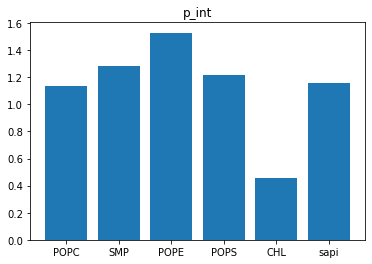

In [92]:
fig_p_int, ax_p_int = plt.subplots()
ax_p_int.bar(lipid_data.lipid_type,lipid_data.relative_p_int)
ax_p_int.set_title('p_int')
fig_p_int.show()

<ipython-input-90-1d566ddf0d16>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig_p_hbond.show()


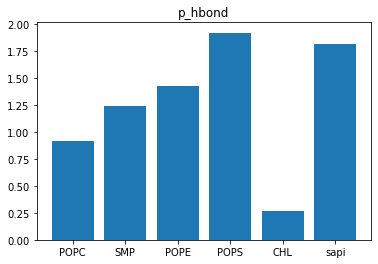

In [90]:
fig_p_hbond, ax_p_hbond = plt.subplots()
ax_p_hbond.bar(lipid_data.lipid_type,lipid_data.relative_p_hbond)
ax_p_hbond.set_title('p_hbond')
fig_p_hbond.show()

___


Тут буду ебашить через функцию

In [3]:
!ls lipid_data

c315.1.w_cont_dc_ft.csv        do315.1.w_cont_hbond_hb_ft.csv
c315.1.w_cont_hbond_hb_ft.csv  ds315.1.w_cont_dc_ft.csv
c315.2.w_cont_dc_ft.csv        ds315.1.w_cont_hbond_hb_ft.csv
c315.2.w_cont_hbond_hb_ft.csv  s315.1.w_cont_dc_ft.csv
do315.1.w_cont_dc_ft.csv       s315.1.w_cont_hbond_hb_ft.csv


## do315.1.w

In [4]:
membrane_do3151w={'POPC':209, 'POPE':114, 'POPS':108, 'sapi':54, 'SMP':111, 'CHL':277}

data_do3151w = p_lipids(file_int='lipid_data/do315.1.w_cont_dc_ft.csv', 
         file_hbonds='lipid_data/do315.1.w_cont_hbond_hb_ft.csv',
         ignore_CHL=False,
         membrane_compound=membrane_do3151w)

data_do3151w_ignCHL = p_lipids(file_int='lipid_data/do315.1.w_cont_dc_ft.csv', 
         file_hbonds='lipid_data/do315.1.w_cont_hbond_hb_ft.csv',
         ignore_CHL=True,
         membrane_compound=membrane_do3151w)

data_do3151w['system']='do315.1.w'
data_do3151w_ignCHL['system']='do315.1.w'

<ipython-input-5-1bcc351f7c85>:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


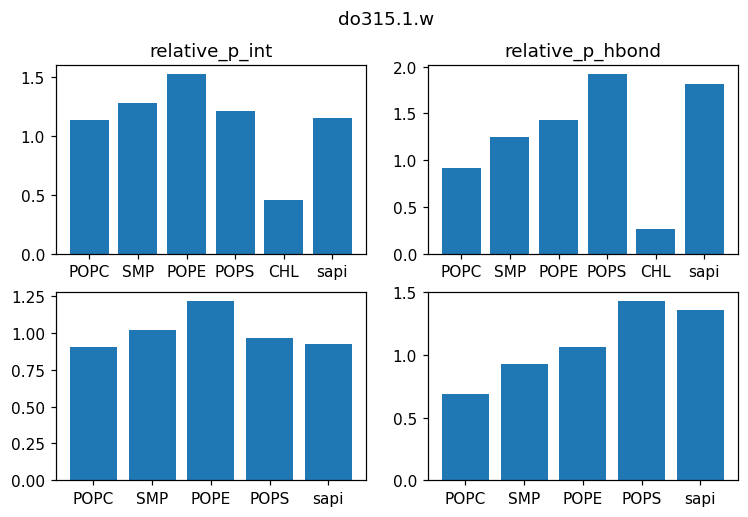

In [5]:
fig, ax = plt.subplots(nrows=2, ncols=2)
fig.set_figwidth(8)
fig.set_figheight(5)
fig.set_dpi(110)

ax[0][0].bar(x=data_do3151w.lipid_type, height=data_do3151w.relative_p_int)
ax[0][1].bar(x=data_do3151w.lipid_type, height=data_do3151w.relative_p_hbond)
ax[1][0].bar(x=data_do3151w_ignCHL.lipid_type, height=data_do3151w_ignCHL.relative_p_int)
ax[1][1].bar(x=data_do3151w_ignCHL.lipid_type, height=data_do3151w_ignCHL.relative_p_hbond)

ax[0][0].set_title('relative_p_int')
ax[0][1].set_title('relative_p_hbond')
fig.suptitle('do315.1.w')

fig.show()


## ds315.1.w

In [6]:
membrane_ds3151w={'POPC':215, 'POPE':115, 'POPS':110, 'sapi':55, 'SMP':113, 'CHL':281}

data_ds3151w = p_lipids(file_int='lipid_data/ds315.1.w_cont_dc_ft.csv', 
         file_hbonds='lipid_data/ds315.1.w_cont_hbond_hb_ft.csv',
         ignore_CHL=False,
         membrane_compound=membrane_ds3151w)

data_ds3151w_ignCHL = p_lipids(file_int='lipid_data/ds315.1.w_cont_dc_ft.csv', 
         file_hbonds='lipid_data/ds315.1.w_cont_hbond_hb_ft.csv',
         ignore_CHL=True,
         membrane_compound=membrane_ds3151w)
data_ds3151w['system']='ds315.1.w'
data_ds3151w_ignCHL['system']='ds315.1.w'

<ipython-input-7-6e248790b4d5>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


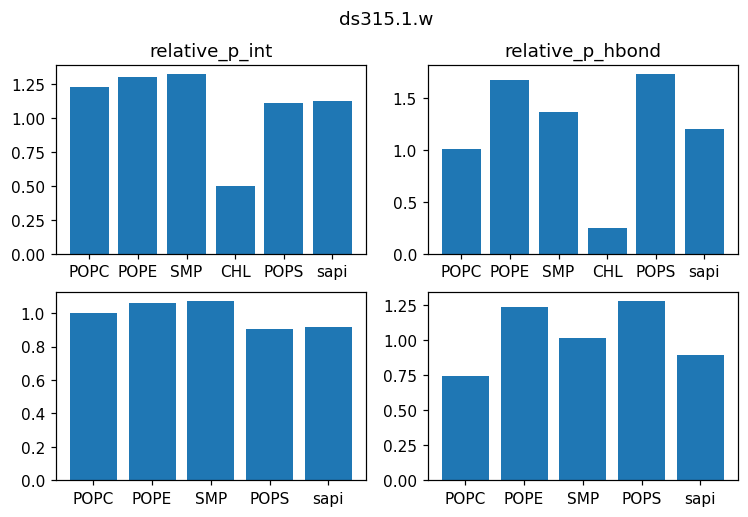

In [7]:
fig, ax = plt.subplots(nrows=2, ncols=2)
fig.set_figwidth(8)
fig.set_figheight(5)
fig.set_dpi(110)

ax[0][0].bar(x=data_ds3151w.lipid_type, height=data_ds3151w.relative_p_int)
ax[0][1].bar(x=data_ds3151w.lipid_type, height=data_ds3151w.relative_p_hbond)
ax[1][0].bar(x=data_ds3151w_ignCHL.lipid_type, height=data_ds3151w_ignCHL.relative_p_int)
ax[1][1].bar(x=data_ds3151w_ignCHL.lipid_type, height=data_ds3151w_ignCHL.relative_p_hbond)

ax[0][0].set_title('relative_p_int')
ax[0][1].set_title('relative_p_hbond')
fig.suptitle('ds315.1.w')



fig.show()

## s315.1.w

In [8]:
membrane_s3151w={'POPC':232, 'POPE':107, 'POPS':113, 'sapi':50, 'SMP':102, 'CHL':281}

data_s3151w = p_lipids(file_int='lipid_data/s315.1.w_cont_dc_ft.csv', 
         file_hbonds='lipid_data/s315.1.w_cont_hbond_hb_ft.csv',
         ignore_CHL=False,
         membrane_compound=membrane_s3151w)

data_s3151w_ignCHL = p_lipids(file_int='lipid_data/s315.1.w_cont_dc_ft.csv', 
         file_hbonds='lipid_data/s315.1.w_cont_hbond_hb_ft.csv',
         ignore_CHL=True,
         membrane_compound=membrane_s3151w)
data_s3151w['system']='s315.1.w'
data_s3151w_ignCHL['system']='s315.1.w'

<ipython-input-9-c00b1b6502c3>:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


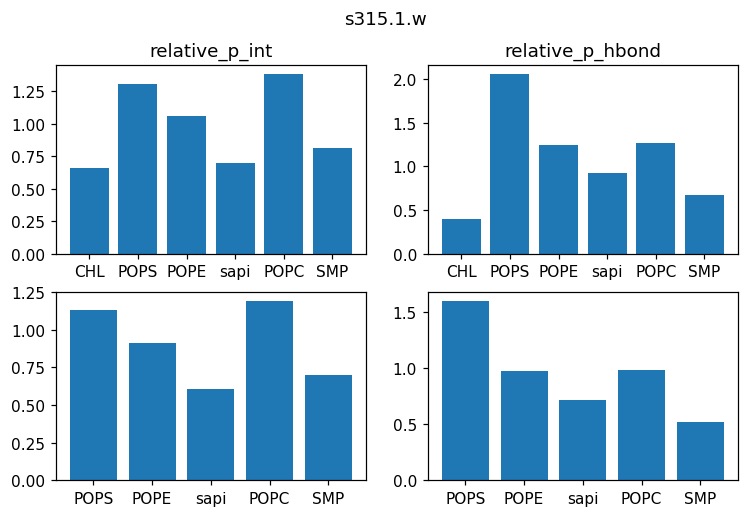

In [9]:
fig, ax = plt.subplots(nrows=2, ncols=2)
fig.set_figwidth(8)
fig.set_figheight(5)
fig.set_dpi(110)

ax[0][0].bar(x=data_s3151w.lipid_type, height=data_s3151w.relative_p_int)
ax[0][1].bar(x=data_s3151w.lipid_type, height=data_s3151w.relative_p_hbond)
ax[1][0].bar(x=data_s3151w_ignCHL.lipid_type, height=data_s3151w_ignCHL.relative_p_int)
ax[1][1].bar(x=data_s3151w_ignCHL.lipid_type, height=data_s3151w_ignCHL.relative_p_hbond)

ax[0][0].set_title('relative_p_int')
ax[0][1].set_title('relative_p_hbond')
fig.suptitle('s315.1.w')

fig.show()

## c315.1.w

In [10]:
membrane_c3151w={'POPC':215, 'POPE':114, 'POPS':110, 'sapi':53, 'SMP':115, 'CHL':282}

data_c3151w = p_lipids(file_int='lipid_data/c315.1.w_cont_dc_ft.csv', 
         file_hbonds='lipid_data/c315.1.w_cont_hbond_hb_ft.csv',
         ignore_CHL=False,
         membrane_compound=membrane_c3151w)

data_c3151w_ignCHL = p_lipids(file_int='lipid_data/c315.1.w_cont_dc_ft.csv', 
         file_hbonds='lipid_data/c315.1.w_cont_hbond_hb_ft.csv',
         ignore_CHL=True,
         membrane_compound=membrane_c3151w)
data_c3151w['system']='c315.1.w'
data_c3151w_ignCHL['system']='c315.1.w'

<ipython-input-11-2484872c29ed>:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


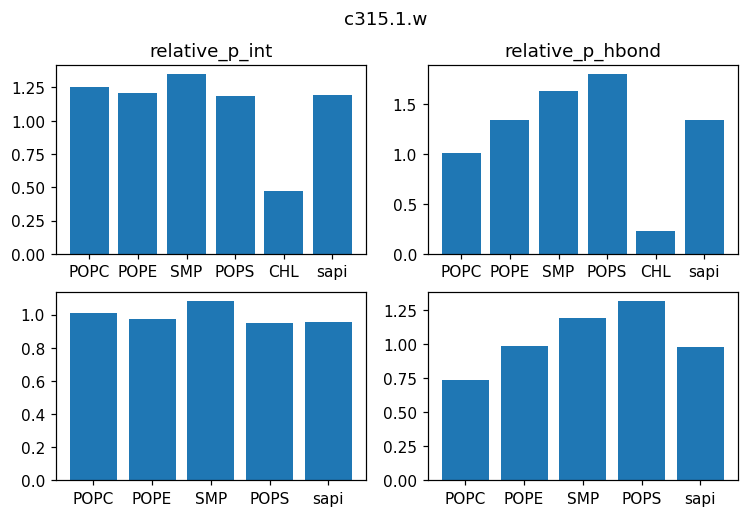

In [11]:
fig, ax = plt.subplots(nrows=2, ncols=2)
fig.set_figwidth(8)
fig.set_figheight(5)
fig.set_dpi(110)

ax[0][0].bar(x=data_c3151w.lipid_type, height=data_c3151w.relative_p_int)
ax[0][1].bar(x=data_c3151w.lipid_type, height=data_c3151w.relative_p_hbond)
ax[1][0].bar(x=data_c3151w_ignCHL.lipid_type, height=data_c3151w_ignCHL.relative_p_int)
ax[1][1].bar(x=data_c3151w_ignCHL.lipid_type, height=data_c3151w_ignCHL.relative_p_hbond)

ax[0][0].set_title('relative_p_int')
ax[0][1].set_title('relative_p_hbond')
fig.suptitle('c315.1.w')

fig.show()

## c315.2.w

In [12]:
membrane_c3152w={'POPC':217, 'POPE':113, 'POPS':110, 'sapi':52, 'SMP':105, 'CHL':272}

data_c3152w = p_lipids(file_int='lipid_data/c315.2.w_cont_dc_ft.csv', 
         file_hbonds='lipid_data/c315.2.w_cont_hbond_hb_ft.csv',
         ignore_CHL=False,
         membrane_compound=membrane_c3152w)

data_c3152w_ignCHL = p_lipids(file_int='lipid_data/c315.2.w_cont_dc_ft.csv', 
         file_hbonds='lipid_data/c315.2.w_cont_hbond_hb_ft.csv',
         ignore_CHL=True,
         membrane_compound=membrane_c3152w)
data_c3152w['system']='c315.2.w'
data_c3152w_ignCHL['system']='c315.2.w'

<ipython-input-13-fe679e6e9c0f>:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


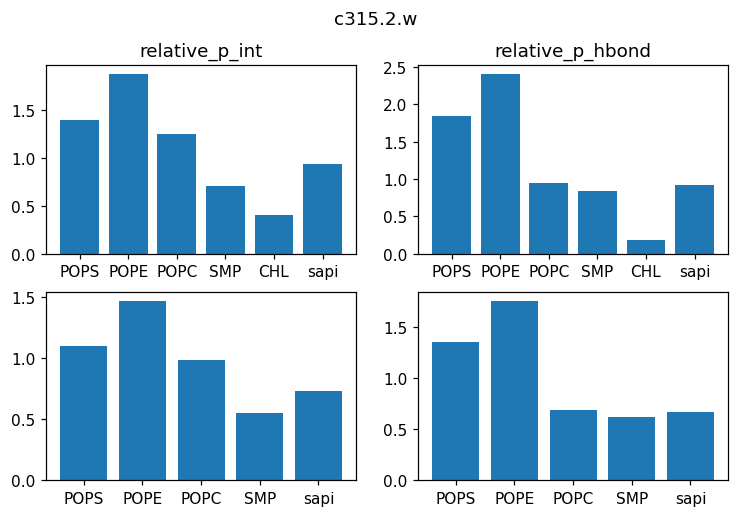

In [13]:
fig, ax = plt.subplots(nrows=2, ncols=2)
fig.set_figwidth(8)
fig.set_figheight(5)
fig.set_dpi(110)

ax[0][0].bar(x=data_c3152w.lipid_type, height=data_c3152w.relative_p_int)
ax[0][1].bar(x=data_c3152w.lipid_type, height=data_c3152w.relative_p_hbond)
ax[1][0].bar(x=data_c3152w_ignCHL.lipid_type, height=data_c3152w_ignCHL.relative_p_int)
ax[1][1].bar(x=data_c3152w_ignCHL.lipid_type, height=data_c3152w_ignCHL.relative_p_hbond)

ax[0][0].set_title('relative_p_int')
ax[0][1].set_title('relative_p_hbond')
fig.suptitle('c315.2.w')

fig.show()

In [32]:
all_systems=pd.concat([data_do3151w_ignCHL, data_ds3151w_ignCHL, data_s3151w_ignCHL, data_c3151w_ignCHL, data_c3152w_ignCHL])

In [38]:
all_systems.head(30)

,lipid_type,p_int,number,part,relative_p_int,p_hbond,relative_p_hbond,system
0,POPC,0.317897,209,0.350671,0.906539,0.240098,0.684681,do315.1.w
1,SMP,0.190098,111,0.186242,1.020704,0.173149,0.929702,do315.1.w
2,POPE,0.233165,114,0.191275,1.219002,0.204068,1.066883,do315.1.w
3,POPS,0.175359,108,0.181208,0.967723,0.259774,1.433570,do315.1.w
4,sapi,0.083481,54,0.090604,0.921388,0.122910,1.356566,do315.1.w
0,POPC,0.353606,215,0.353618,0.999965,0.263763,0.745896,ds315.1.w
1,POPE,0.200449,115,0.189145,1.059765,0.234324,1.238861,ds315.1.w
2,SMP,0.199817,113,0.185855,1.075120,0.188504,1.014253,ds315.1.w
3,POPS,0.163284,110,0.180921,0.902514,0.232429,1.284700,ds315.1.w
4,sapi,0.082844,55,0.090461,0.915806,0.080980,0.895195,ds315.1.w


In [46]:
# проверка того, что ниже
all_systems.loc[all_systems.lipid_type=='POPE'].describe()

,p_int,number,part,relative_p_int,p_hbond,relative_p_hbond
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.211342,112.600000,0.186932,1.127362,0.225723,1.204471
std,0.045919,3.209361,0.005605,0.225034,0.064217,0.327129
min,0.161969,107.000000,0.177152,0.914290,0.172495,0.973710
25%,0.182278,113.000000,0.187809,0.970552,0.184963,0.984846
50%,0.200449,114.000000,0.189145,1.059765,0.204068,1.066883
75%,0.233165,114.000000,0.189280,1.219002,0.234324,1.238861
max,0.278847,115.000000,0.191275,1.473201,0.332764,1.758055


In [34]:
summary = all_systems.groupby('lipid_type', as_index=False) \
    .agg({'relative_p_int':['mean', 'std'], 'relative_p_hbond':['mean', 'std']})
summary

lipid_type relative_p_int           relative_p_hbond          
                       mean       std             mean       std
0       POPC       1.017927  0.105981         0.770390  0.124371
1       POPE       1.127362  0.225034         1.204471  0.327129
2       POPS       1.009539  0.098960         1.399022  0.127272
3        SMP       0.887417  0.243294         0.856352  0.280272
4       sapi       0.825929  0.151580         0.925127  0.272169

In [35]:
summary.relative_p_int['mean']

0    1.017927
1    1.127362
2    1.009539
3    0.887417
4    0.825929
Name: mean, dtype: float64

<ipython-input-45-9293e03904d9>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


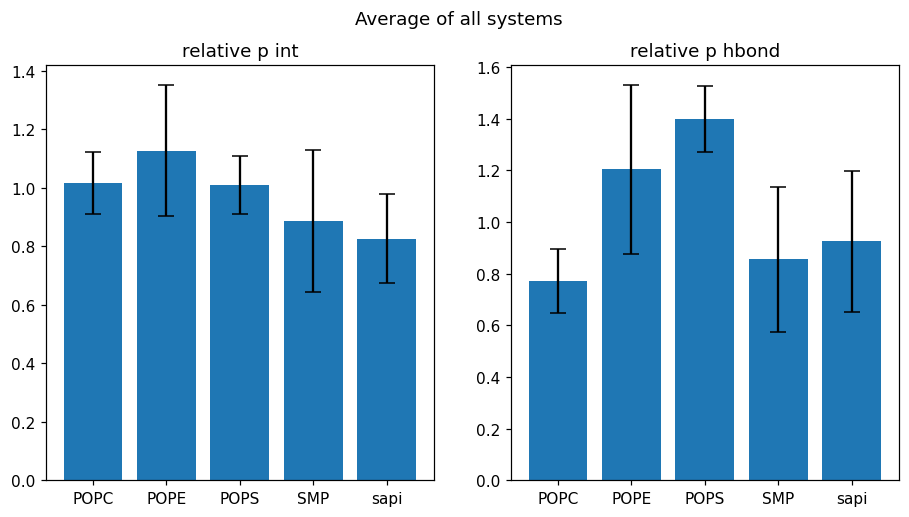

In [45]:
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_figwidth(10)
fig.set_figheight(5)
fig.set_dpi(110)

ax[0].bar(x=summary.lipid_type, height=summary.relative_p_int['mean'], yerr=summary.relative_p_int['std'], capsize=5)
ax[1].bar(x=summary.lipid_type, height=summary.relative_p_hbond['mean'], yerr=summary.relative_p_hbond['std'], capsize=5)

ax[0].set_title('relative p int')
ax[1].set_title('relative p hbond')
fig.suptitle('Average of all systems')

fig.show()

# График для остатков аминокислот

1. Надо посмотреть все структуры, совпадают ли сиквенсы и номера

In [1]:
!ls TRPV3_structures

6pvl.pdb  6pvm.pdb  do42w.pdb  ds42w.pdb


6pvl.pdb - c315.1.w & c315.2.w  
6pvm.pdb - s315.1.w  
ds42w.pdb - ds315.1.w  
do42w.pdb - do315.1.w

In [11]:
from Bio import SeqIO
c = list(SeqIO.parse('TRPV3_structures/6pvl.pdb', format='pdb-atom'))
s = list(SeqIO.parse('TRPV3_structures/6pvm.pdb', format='pdb-atom'))
ds = list(SeqIO.parse('TRPV3_structures/ds42w.pdb', format='pdb-atom'))
do = list(SeqIO.parse('TRPV3_structures/do42w.pdb', format='pdb-atom'))

/home/alexandr/anaconda3/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 22362.
  warnings.warn(
/home/alexandr/anaconda3/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 22407.
  warnings.warn(
/home/alexandr/anaconda3/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 22408.
  warnings.warn(
/home/alexandr/anaconda3/lib/python3.8/site-packages/Bio/PDB/PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 20809
  warnings.warn(
/home/alexandr/anaconda3/lib/python3.8/site-packages/Bio/SeqIO/PdbIO.py:303: BiopythonParserWarning: 'HEADER' line not found; can't determine PDB ID.
  warnings.warn(
/home/alexandr/anaconda3/lib/python3.8/site-packages/Bio/PDB/PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'END' a

In [13]:
len(c), len(s), len(do), len(ds)

(4, 4, 4, 4)

In [17]:
n = 0
for structure in [c, s, do, ds]:
    for i in range(1, 4):
        if structure[0].seq != structure[i].seq:
            n+=1
print(n)

0


В каждой структуре субъединицы равны между собой по сиквенсам

In [32]:
do[0].id, do[0].description = 'do42w:A', 'do42w:A'
ds[0].id, ds[0].description = 'ds42w:A', 'ds42w:A'

Теперь бы выравнять последовательности, чтобы посмотреть, не отличаются ли они между структурами

In [34]:
with open('TRPV3_seqs.fasta', 'w') as output_handle:
    count = SeqIO.write([c[0], s[0], ds[0], do[0]], output_handle, 'fasta')
    print('Converted %i records'%count)

Converted 4 records


In [36]:
from Bio.Align.Applications import MuscleCommandline
muscle_cline = MuscleCommandline(input="TRPV3_seqs.fasta")
stdout, stderr = muscle_cline()
#from io import StringIO
#from Bio import AlignIO
#align = AlignIO.read(StringIO(stdout), "fasta")
#print(align)

In [40]:
import io
from Bio import AlignIO
align = AlignIO.read(io.StringIO(stdout), "fasta")
with open('TRPV3_alignment.fasta', 'w') as file:
    AlignIO.write(align, file, 'fasta')

Я пока хз, как визуализировать выравнивание, поэтому пока пусть будет колхоз

In [48]:
do[0].seq[1:] == c[0].seq[:-6]

True

Кароче они все равны, но обрезаны, подправить нумерацию - и всё будет норм

In [50]:
!ls lipid_data

c315.1.w_cont_dc_ft.csv        do315.1.w_cont_hbond_hb_ft.csv
c315.1.w_cont_hbond_hb_ft.csv  ds315.1.w_cont_dc_ft.csv
c315.2.w_cont_dc_ft.csv        ds315.1.w_cont_hbond_hb_ft.csv
c315.2.w_cont_hbond_hb_ft.csv  s315.1.w_cont_dc_ft.csv
do315.1.w_cont_dc_ft.csv       s315.1.w_cont_hbond_hb_ft.csv


In [57]:
c_data=pd.read_csv('lipid_data/c315.1.w_cont_dc_ft.csv', header=None, sep='\s+').drop(columns=5)
c_data.columns = list(i for i in range(0, 11))
c_data[10] = c_data[10].apply(lambda x:x[1:])

ds_data=pd.read_csv('lipid_data/ds315.1.w_cont_dc_ft.csv', header=None, sep='\s+').drop(columns=5)
ds_data.columns = list(i for i in range(0, 11))
ds_data[10] = ds_data[10].apply(lambda x:x[1:])

In [84]:
ds_data.loc[ds_data[9]==ds_data[9].min()]

,0,1,2,3,4,5,6,7,8,9,10
3349,4,35,0,POPC,1,1,1,93,GLU,211,0.021997250343707038
3366,8,510,0,SMP,1,1,1,93,GLU,211,0.021622297212848394
3709,5,275,0,POPE,1,0,0,93,GLU,211,0.014373203349581302
3850,6,345,0,POPS,1,1,1,93,GLU,211,0.012248468941382326
5008,6,408,0,POPS,1,0,0,93,GLU,211,0.0028746406699162604
5215,6,411,0,POPS,1,0,0,93,GLU,211,0.0022497187851518562
5316,4,32,0,POPC,1,1,1,93,GLU,211,0.001999750031246094
5744,8,552,0,SMP,1,0,0,93,GLU,211,0.0011248593925759281
6233,4,153,0,POPC,1,0,0,93,GLU,211,0.0006249218847644045
6313,4,133,0,POPC,1,2,2,93,GLU,211,0.0004999375078115235


In [87]:
do_data=pd.read_csv('lipid_data/do315.1.w_cont_dc_ft.csv', header=None, sep='\s+').drop(columns=5)
do_data.columns = list(i for i in range(0, 11))
do_data[10] = do_data[10].apply(lambda x:x[1:])

do_data.loc[do_data[9]==211]

,0,1,2,3,4,5,6,7,8,9,10
2306,4,148,0,POPC,1,1,1,97,GLU,211,0.07861517310336208
2686,6,402,0,POPS,1,1,1,97,GLU,211,0.046494188226471694
2838,8,537,0,SMP,1,1,1,97,GLU,211,0.03837020372453443
3280,8,570,0,SMP,1,1,1,97,GLU,211,0.021997250343707038
3442,4,159,0,POPC,1,1,1,97,GLU,211,0.017622797150356206
3509,8,538,0,SMP,1,1,1,97,GLU,211,0.016247969003874516
3867,8,500,0,SMP,1,0,0,97,GLU,211,0.010623672040994875
4404,5,224,0,POPE,1,0,0,97,GLU,211,0.005124359455068116
4439,4,28,0,POPC,1,0,0,97,GLU,211,0.004874390701162355
4726,8,554,0,SMP,1,2,2,97,GLU,211,0.003499562554680665


In [88]:
do[0].seq[97], ds[0].seq[93]

('E', 'E')

## Кароче у них с нумерацией всё нормально

начинаем

In [3]:
c3151w=pd.read_csv('lipid_data/c315.1.w_cont_dc_ft.csv', header=None, sep='\s+').drop(columns=5)
c3151w.columns = list(i for i in range(0, 11))
c3151w[10] = c3151w[10].apply(lambda x:x[1:])
c3151w['system']='c315.1.w'

c3152w=pd.read_csv('lipid_data/c315.2.w_cont_dc_ft.csv', header=None, sep='\s+').drop(columns=5)
c3152w.columns = list(i for i in range(0, 11))
c3152w[10] = c3152w[10].apply(lambda x:x[1:])
c3152w['system']='c315.2.w'

ds3151w=pd.read_csv('lipid_data/ds315.1.w_cont_dc_ft.csv', header=None, sep='\s+').drop(columns=5)
ds3151w.columns = list(i for i in range(0, 11))
ds3151w[10] = ds3151w[10].apply(lambda x:x[1:])
ds3151w['system']='ds315.1.w'

s3151w=pd.read_csv('lipid_data/s315.1.w_cont_dc_ft.csv', header=None, sep='\s+').drop(columns=5)
s3151w.columns = list(i for i in range(0, 11))
s3151w[10] = s3151w[10].apply(lambda x:x[1:])
s3151w['system']='s315.1.w'

do3151w=pd.read_csv('lipid_data/do315.1.w_cont_dc_ft.csv', header=None, sep='\s+').drop(columns=5)
do3151w.columns = list(i for i in range(0, 11))
do3151w[10] = do3151w[10].apply(lambda x:x[1:])
do3151w['system']='do315.1.w'

In [4]:
data_all = pd.concat([c3151w, c3152w, ds3151w, s3151w, do3151w])
data_all = data_all.reset_index(drop=True)

In [5]:
data_all

,0,1,2,3,4,5,6,7,8,9,10,system
0,4,53,0,POPC,1,1,1,591,MET,706,1.0,c315.1.w
1,5,240,0,POPE,1,1,1,342,LEU,457,1.0,c315.1.w
2,5,315,0,POPE,1,3,3,473,LEU,588,1.0,c315.1.w
3,8,582,0,SMP,1,3,3,438,LEU,553,1.0,c315.1.w
4,4,53,0,POPC,1,1,1,590,LYS,705,1.0,c315.1.w
...,...,...,...,...,...,...,...,...,...,...,...,...
38535,4,149,0,POPC,1,1,1,132,LYS,246,0.00012498437695288088,do315.1.w
38536,6,384,0,POPS,1,3,3,370,LEU,484,0.00012498437695288088,do315.1.w
38537,4,149,0,POPC,1,1,1,135,PHE,249,0.00012498437695288088,do315.1.w
38538,4,149,0,POPC,1,1,1,180,SER,294,0.00012498437695288088,do315.1.w


In [6]:
data_all.loc[1, 9]

457

In [7]:
print(data_all[9].min(), data_all[9].max())
print(data_all[9].max() - data_all[9].min())

209 758
549


возьмем пока по 19

In [8]:
left = list(range(data_all[9].min(), data_all[9].max() - 19, 19))
right = list(range(data_all[9].min() + 18, data_all[9].max(), 19))

In [9]:
%%time
data_all['interval']=0
for n in range(0, len(data_all)):
    if data_all[9][n] > 740:
            data_all.loc[n, 'interval'] = '741 - 758'
            continue
    for i, j in zip(left, right):
        if i <= data_all[9][n] <= j:
            data_all.loc[n, 'interval'] = str(i) + ' - ' + str(j)
            break

CPU times: user 58.4 s, sys: 399 ms, total: 58.8 s
Wall time: 59 s


In [16]:
data_all.loc[data_all[9]<250]

,0,1,2,3,4,5,6,7,8,9,10,system,interval
2237,6,408,0,POPS,1,2,2,134,PHE,249,0.0987376577927759,c315.1.w,247 - 265
3853,4,151,0,POPC,1,2,2,96,GLU,211,0.013498312710911136,c315.1.w,209 - 227
4011,4,155,0,POPC,1,2,2,134,PHE,249,0.0111236095488064,c315.1.w,247 - 265
4180,8,545,0,SMP,1,2,2,134,PHE,249,0.008998875140607425,c315.1.w,247 - 265
4586,5,302,0,POPE,1,2,2,134,PHE,249,0.005249343832020997,c315.1.w,247 - 265
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38498,4,152,0,POPC,1,1,1,95,THR,209,0.00012498437695288088,do315.1.w,209 - 227
38503,4,154,0,POPC,1,1,1,97,GLU,211,0.00012498437695288088,do315.1.w,209 - 227
38507,4,159,0,POPC,1,1,1,133,GLY,247,0.00012498437695288088,do315.1.w,247 - 265
38535,4,149,0,POPC,1,1,1,132,LYS,246,0.00012498437695288088,do315.1.w,228 - 246


In [11]:
data_all.loc[data_all[9]>740]

,0,1,2,3,4,5,6,7,8,9,10,system,interval
596,6,359,0,POPS,1,1,1,643,ARG,758,0.6877890263717036,c315.1.w,741 - 758
952,5,313,0,POPE,1,3,3,643,ARG,758,0.4478190226221722,c315.1.w,741 - 758
1240,5,299,0,POPE,1,3,3,643,ARG,758,0.3185851768528934,c315.1.w,741 - 758
1253,4,155,0,POPC,1,3,3,643,ARG,758,0.314835645544307,c315.1.w,741 - 758
1436,6,408,0,POPS,1,3,3,643,ARG,758,0.259217597800275,c315.1.w,741 - 758
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30797,4,111,0,POPC,1,2,2,641,ILE,756,0.00012498437695288088,s315.1.w,741 - 758
30806,4,137,0,POPC,1,0,0,642,ARG,757,0.00012498437695288088,s315.1.w,741 - 758
30829,4,199,0,POPC,1,3,3,643,ARG,758,0.00012498437695288088,s315.1.w,741 - 758
31101,4,225,0,POPC,1,3,3,643,ARG,758,0.00012498437695288088,s315.1.w,741 - 758


In [19]:
data_all[10] = data_all[10].astype(float)

Вроде всё норм

In [12]:
data_all.head(5)

,0,1,2,3,4,5,6,7,8,9,10,system,interval
0,4,53,0,POPC,1,1,1,591,MET,706,1.0,c315.1.w,703 - 721
1,5,240,0,POPE,1,1,1,342,LEU,457,1.0,c315.1.w,456 - 474
2,5,315,0,POPE,1,3,3,473,LEU,588,1.0,c315.1.w,570 - 588
3,8,582,0,SMP,1,3,3,438,LEU,553,1.0,c315.1.w,551 - 569
4,4,53,0,POPC,1,1,1,590,LYS,705,1.0,c315.1.w,703 - 721


In [22]:
data_all_sum = data_all.groupby(['system', 'interval'], as_index=False) \
    .agg({10:'sum'})